# <center> Financial Engineering 2

### *(1) Stochastic Calculus and Brownian Motion*
### *<span style='color:blue'>(2) Pricing Options:*
> *2.1) n-Period Binomial Tree Model* <br>
> *2.2) Black-Scholes Model*

### *(3) Pricing Interest Rates and Bonds:*
### *(4) Modeling Credit Risk*
> *4.1) Merton Model* <br>
> *4.2) Jarrow Lando Turnbull Model*

#### <span style='color:blue'> 2.1) n-Period Binomial Tree Model:
#### European Options:   

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from graphviz import Source
from math import exp
import numpy as np
import math

In [3]:
def nodeCal_EUR(n,val,sp_op):
    G=nx.Graph()
    for i in range(n+1):
        for k in range(1,i+2):
            if i<n:
                G.add_edge((i,k),(i+1,k))
                G.add_edge((i,k),(i+1,k+1))
    posG,dic={},{}
    
    for i,node in enumerate(G.nodes()):
        posG[node]=[node[0],n+2+node[0]-2*node[1]] 
        dic[node]=val[i]
    
    plt.figure(1,figsize=(6,6))
    nx.draw(G,pos=posG,node_size=350,alpha=0.6)
    nx.draw_networkx_labels(G,posG,labels=dic,font_size=18)
    xmax=n
    ymax=n*2
    if sp_op == True:
        plt.suptitle(f"{n}-Period Binomial Stock Price Lattice:")
    if sp_op == False:
        plt.suptitle(f"{n}-Period Binomial Option Price Lattice:")
    plt.xlim(-1,xmax+1)
    plt.ylim(-1,ymax+1)
    plt.show() 
    
#--------------------------------------------------------------------------------
def bin_EUR(S,K,T,r,u,d,n,put,q):
    t=T/n      
    stock_lattice_vals=[];
    option_lattice_vals=[]
    numNodes = np.empty(n+1, dtype=object)
    numNodes[0] = 0
    numNodes[1] = 3
    if put == True: pos = -1
    else: pos = 1
    
    #---------------------------------------------Calculate Stock Price Lattice
    for m in range(n+1):
        for i in range(m+1):
            st = S*(u**(m-i))*(d**i)
            stock_lattice_vals.append(round(st,4)) 
    
    #---------------------------------------------Calculate Option Price Lattice          
    for m in range(n+1):
        for i in range(m+1):
            st = S*(u**(m-i))*(d**i)
            option_lattice_vals.append(round(max(pos*(st-K),0),4))
            
    for k in range (2,n+1): #find the starting node
        numNodes[k] = numNodes[k-1]+k+1
    
    for i in range((numNodes[n]-1)-(n+1),-1,-1):
        if i==0: upBranch=1
        if i in [1,2]: upBranch=2 
        if i in [3,4,5]: upBranch=3
        if i in [6,7,8,9]: upBranch=4
        if i in [10,11,12,13,14]: upBranch=5
        if i in [15,16,17,18,19,20]: upBranch=6
        if i in [21,22,23,24,25,26,27]: upBranch=7
        if i in [28,29,30,31,32,33,34,35]: upBranch=8
        if i in [36,37,38,39,40,41,42,43,44]: upBranch=9
        if i in [45,46,47,48,49,50,51,52,53,54]: upBranch=10
            
        option_lattice_vals[i]=round(exp(-r*t)*(q*option_lattice_vals[i+upBranch]+(1-q)*option_lattice_vals[i+upBranch+1]),4)
    
    return stock_lattice_vals,option_lattice_vals

Pricing European Call Option:

Vars: 
u= 1.0417 
d= 0.96 
q= 0.6128


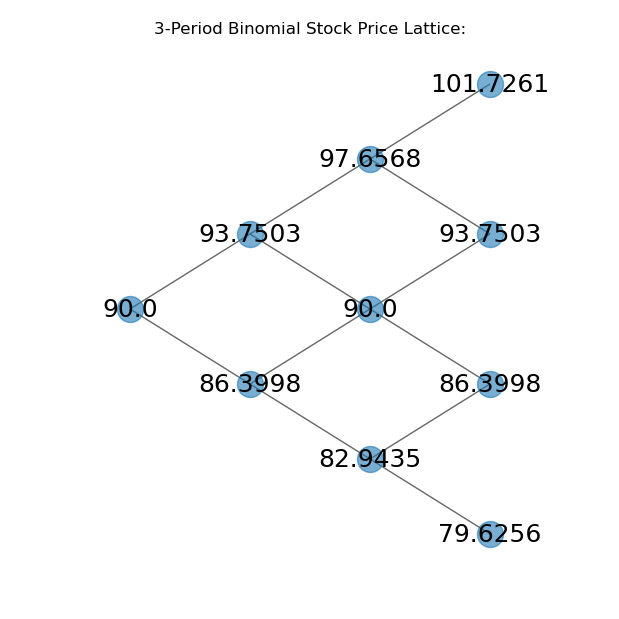

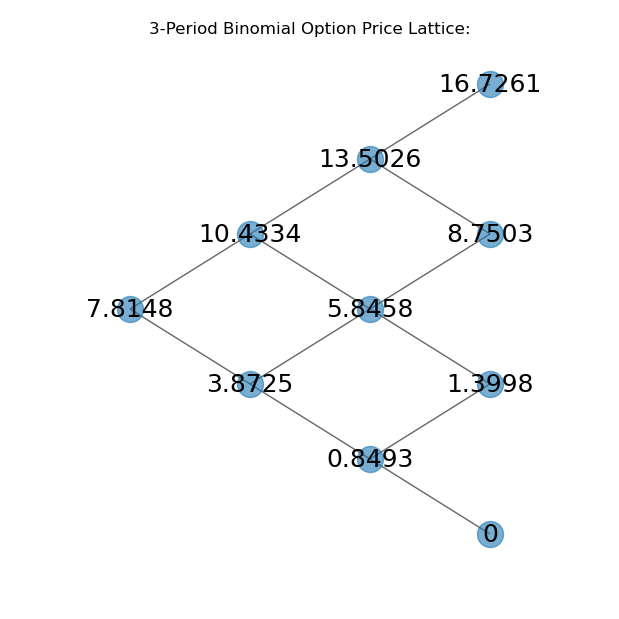

In [4]:
n = 3             #Nr of periods
S0 = 90           #Initial underlying stock price
K = 85            #Strike price
r = 0.06          #Risk free rate
sigma = 0.1       #Volatility
T = 6/12          #Period in years
put_call = False  #Put or call option
sp_op = False     #Calculating the stock price or option price lattice

#-----------------------------------------Initial Calcs
deltaT = T/n
u = np.exp(sigma*np.sqrt(deltaT))
d = 1/u
q = (np.exp(r*deltaT)-d)/(u-d)

if n<10:
    if put_call == False:
        print("\033[1m" + "Pricing European Call Option:\n" + "\033[0m")
    else:
        print("\033[1m" + "Pricing European Put Option:\n" + "\033[0m")
        
    print("\033[1m" + "Vars:"+ "\033[0m" + " \nu=", round(u,4), "\nd=", round(d,4), "\nq=", round(q,4))

    Sv,Ov = bin_EUR(S0, K, T, r, u, d, n, put_call, q)
    nodeCal_EUR(n,Sv,sp_op=True) #plot stock price lattice
    nodeCal_EUR(n,Ov,sp_op=False) #plot option price lattice
else:
    raise ValueError("Reduce the number of periods")

#### $\;\;\;\;\;$ American Options:   

In [5]:
def bin_AM(S,K,T,r,u,d,n,put,q):
    t=T/n      
    stock_lattice_vals=[];
    EV_lattice=[]
    CV_lattice=[]
    MAXVal_lattice=[]
    numNodes = np.empty(n+1, dtype=object)
    numNodes[0] = 0
    numNodes[1] = 3
    if put == True: pos = -1
    else: pos = 1
    
    #---------------------------------------------Calculate Stock Price Lattice
    for m in range(n+1):
        for i in range(m+1):
            st = S*(u**(m-i))*(d**i)
            stock_lattice_vals.append(round(st,4)) 
    
    #---------------------------------------------Calculate Option Price Lattice          
    for m in range(n+1):
        for i in range(m+1):
            st = S*(u**(m-i))*(d**i)
            MAXVal_lattice.append(round(max(pos*(st-K),0),4))

    for k in range (2,n+1): #find the starting node
        numNodes[k] = numNodes[k-1]+k+1
    
    for i in range((numNodes[n]-1)-(n+1),-1,-1):
        if i==0: upBranch=1
        if i in [1,2]: upBranch=2 
        if i in [3,4,5]: upBranch=3
        if i in [6,7,8,9]: upBranch=4
        if i in [10,11,12,13,14]: upBranch=5
        if i in [15,16,17,18,19,20]: upBranch=6
        if i in [21,22,23,24,25,26,27]: upBranch=7
        if i in [28,29,30,31,32,33,34,35]: upBranch=8
        if i in [36,37,38,39,40,41,42,43,44]: upBranch=9
        if i in [45,46,47,48,49,50,51,52,53,54]: upBranch=10
        MAXVal_lattice[i]=max(MAXVal_lattice[i],
                              round(exp(-r*t)*(q*MAXVal_lattice[i+upBranch]+(1-q)*MAXVal_lattice[i+upBranch+1]),4))
                              
    return stock_lattice_vals, MAXVal_lattice

Pricing American Put Option:

Vars: 
u= 1.036 
d= 0.9653 
q= 0.5976


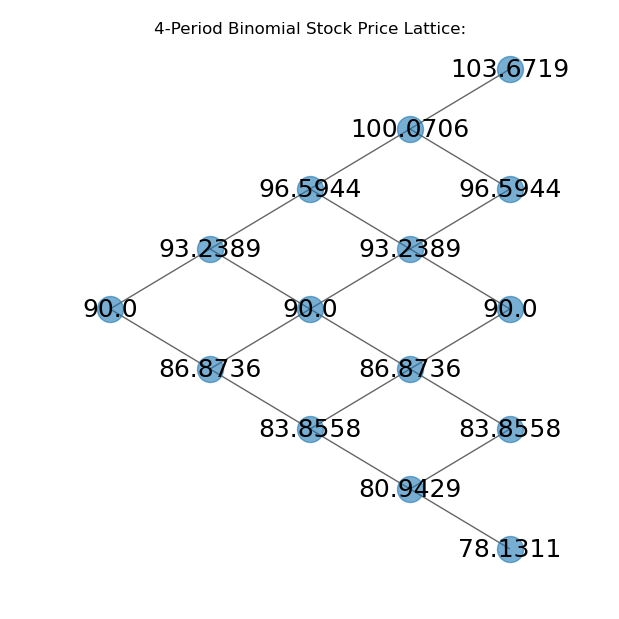

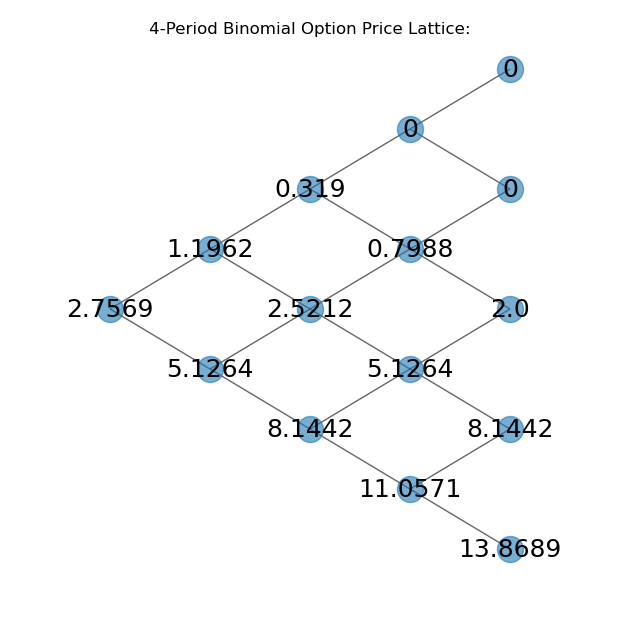

In [6]:
n = 4             #Nr of periods
S0 = 90           #Initial underlying stock price
K = 92            #Strike price
r = 0.06          #Risk free rate
sigma = 0.1       #Volatility
T = 6/12          #Period in years
put_call = True  #Put or call option
sp_op = False     #Calculating the stock price or option price lattice

#-----------------------------------------Initial Calcs
deltaT = T/n
u = np.exp(sigma*np.sqrt(deltaT))
d = 1/u
q = (np.exp(r*deltaT)-d)/(u-d)

if n<10:
    if put_call == False:
        print("\033[1m" + "Pricing American Call Option:\n" + "\033[0m")
    else:
        print("\033[1m" + "Pricing American Put Option:\n" + "\033[0m")
        
    print("\033[1m" + "Vars:"+ "\033[0m" + " \nu=", round(u,4), "\nd=", round(d,4), "\nq=", round(q,4))

    Sv,Ov = bin_AM(S0, K, T, r, u, d, n, put_call, q)
    nodeCal_EUR(n,Sv,sp_op=True) #plot stock price lattice
    nodeCal_EUR(n,Ov,sp_op=False) #plot option price lattice
else:
    raise ValueError("Reduce the number of periods")

#### <span style='color:blue'> 2.2) Black-Scholes Model:

**1) ASSUMPTIONS:**
  * It works on European options that can only be exercised at expiration.
  * No dividends are paid out during the option’s life.
  * Stock markets are efficient. 
  * There are no transaction and commissions costs in buying the option.
  * The risk-free rate and volatility of the underlying are known and constant.
  * The returns on the underlying are normally distributed.
    
***

**2) INPUT VARS:**
* S   := Underlying price (per share)
* K   := Strike price of the option (per share)
* T-t := Time to maturity (years)
* r := Continuously compounding risk-free interest rate
* $\sigma$ := Volatility
    
***

**3) BS PDE:**
\begin{equation}
	\frac{\partial \mathrm V}{ \partial \mathrm t } + \mathrm r \mathrm S \frac{\partial \mathrm V}{\partial \mathrm S}\ 
    + \frac{1}{2}\sigma^{2} \mathrm S^{2} \frac{\partial^{2} \mathrm V}{\partial \mathrm S^2} -\mathrm r \mathrm V =0
\end{equation}
    
$C(S_{t},K,t)=S_{t}\Phi (d_{1})-Ke^{-r(T-t)}\Phi (d_{2})$ $\;\;\;\;\;\;\;$...Price of a Euro Call Option
    
$P(S_{t},K,t)=Ke^{-r(T-t)}\Phi (-d_{2})-S_{t}\Phi (-d_{1})$ $\;\;\;$...Price of a Euro Put Option
   
$d_{1}=\frac{\ln \frac{S_{t}}{K} + (r + \frac{\sigma^2}{2})(T-t)}{\sigma\sqrt{T-t}}$

$d_{2}=d_{1}-\sigma\sqrt{T-t}$

**The Greeks:**
- Delta: The rate of change of the option price respected to the rate of the change of underlying asset price. 
- Gamma: The rate of change of delta respected to the rate of change of underlying asset price.
- Vega: The rate of change of the option price respected to the volatility of the underlying asset. 
- Rho: The rate of the option price respected to the interest rate. 
- Theta: The rate of change of the option price respected to the passage of time.

In [92]:
from scipy.stats import norm
from datetime import datetime, date
import pandas as pd
from pandas import DataFrame
import numpy as np

#defs
def d1(S,K,T,t,r,sigma):
    return(np.log(S/K)+(r+sigma**2/2)*(T-t))/sigma*np.sqrt(T-t)

def d2(S,K,T,t,r,sigma):
    return d1(S,K,T,t,r,sigma)-sigma*np.sqrt(T-t)

def bs_call(S,K,T,t,r,sigma): #call options price function
    return S*norm.cdf(d1(S,K,T,t,r,sigma))-K*np.exp(-r*(T-t))*norm.cdf(d2(S,K,T,t,r,sigma))

def bs_put(S,K,T,t,r,sigma): #put options price function
    return K*np.exp(-r*(T-t))*norm.cdf(-d2(S,K,T,t,r,sigma))-S*norm.cdf(-d1(S,K,T,t,r,sigma))

#Greeks
def delta(S,K,T,t,r,sigma, oType): #Delta is the option’s sensitivity to small changes in the underlying price.
    if oType == "call":
        delta = norm.cdf(d1(S,K,T,t,r,sigma))
    elif oType =="put":
        delta = -norm.cdf(-d1(S,K,T,t,r,sigma))
    return delta

def gamma(S,K,T,t,r,sigma,oType):
    if oType == "call" or oType =="put":
        gamma = norm.pdf(d1(S,K,T,t,r,sigma))/(S*sigma*np.sqrt(T-t))
    return gamma
    
def vega(S,K,T,t,r,sigma,oType):
    if oType == "call" or oType =="put": 
        vega = 0.01*(S*norm.pdf(d1(S,K,T,t,r,sigma))*np.sqrt(T-t))
    return vega

def theta(S,K,T,t,r,sigma,oType):
    if oType == "call":
        theta = 0.01*(-(S*norm.pdf(d1(S,K,T,t,r,sigma))*sigma)/(2*np.sqrt(T-t)) - r*K*np.exp(-r*(T-t))*norm.cdf(d2(S,K,T,t,r,sigma)))
    elif oType =="put":
        theta = 0.01*(-(S*norm.pdf(d1(S,K,T,t,r,sigma))*sigma)/(2*np.sqrt(T-t)) + r*K*np.exp(-r*(T-t))*norm.cdf(-d2(S,K,T,t,r,sigma)))
    return theta

def rho(S,K,T,t,r,sigma,oType):
    if oType == "call":
        rho = 0.01*(K*(T-t)*np.exp(-r*(T-t))*norm.cdf(d2(S,K,T,t,r,sigma)))
    elif oType =="put":
        rho = 0.01*(-K*(T-t)*np.exp(-r*(T-t))*norm.cdf(-d2(S,K,T,t,r,sigma)))
    return rho

In [94]:
##inputs
S=100
K=100
T= 0.128767
t=0
r = 0.20
sigma = 0.20

data = {'Symbol': ['S', 'K', 'T','t', 'r', '$\sigma$'],
        'Input': [S, K, T, t, r, sigma]}
input_frame = DataFrame(data, columns=['Symbol', 'Input'], 
                   index=['Underlying price', 'Strike price', 'Time to maturity','Time now', 'Risk-free interest rate', 'Volatility'])
input_frame

,Symbol,Input
Underlying price,S,100.000000
Strike price,K,100.000000
Time to maturity,T,0.128767
Time now,t,0.000000
Risk-free interest rate,r,0.200000
Volatility,$\sigma$,0.200000


In [95]:
## calculate the call / put option price and the greeks of the call / put option
price_and_greeks = {'Call' : [bs_call(S,K,T,t,r,sigma,), delta(S,K,T,t,r,sigma,"call"), gamma(S,K,T,t,r,sigma,"call"),vega(S,K,T,t,r,sigma,"call"), rho(S,K,T,t,r,sigma,"call"), theta(S,K,T,t,r,sigma,"call")],
                    'Put' : [bs_put(S,K,T,t,r,sigma),delta(S,K,T,t,r,sigma,"put"), gamma(S,K,T,t,r,sigma,"put"),vega(S,K,T,t,r,sigma,"put"), rho(S,K,T,t,r,sigma,"put"), theta(S,K,T,t,r,sigma,"put")]}
price_and_greeks_frame = DataFrame(price_and_greeks, columns=['Call','Put'], index=['Price', '$\delta$', '$\gamma$','$v$','$\rho$','$\theta$'])
price_and_greeks_frame

,Call,Put
Price,4.112197,1.569736
$\delta$,0.520269,-0.479731
$\gamma$,0.055516,0.055516
$v$,0.142972,0.142972
$\rho$,0.061698,-0.063795
$\theta$,-0.206861,-0.011946


#### <span style='color:red'> Greek Surfaces:

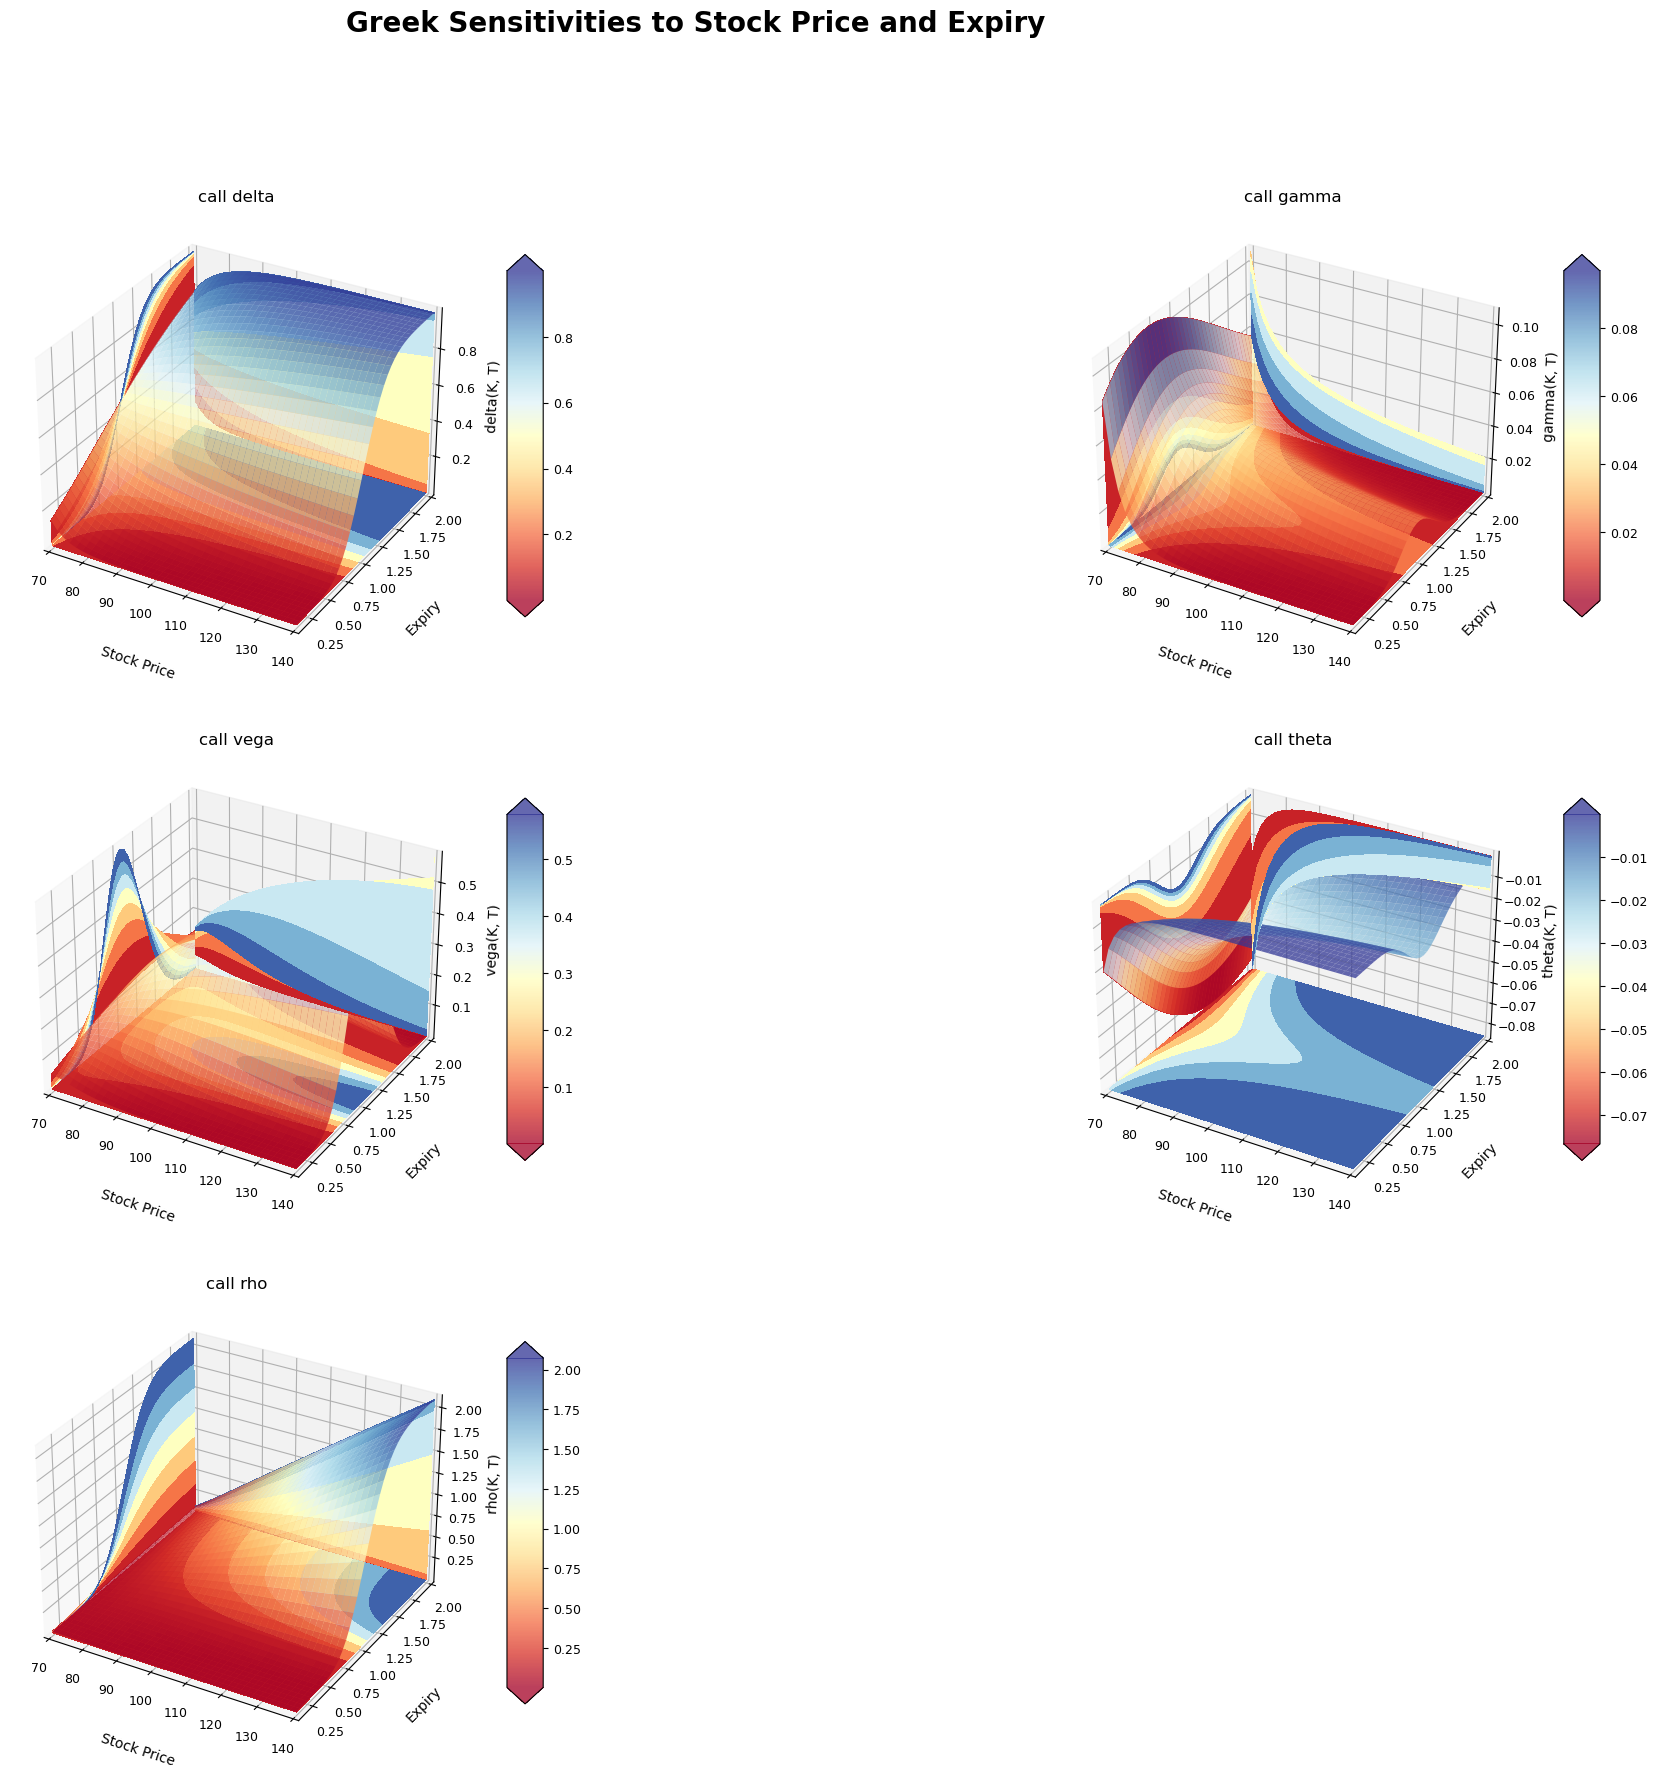

In [109]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


# greek_function: input the function we want to calculate over 
# x_var_name: 1st variable we vary 
# y_var_name: 2nd variable we vary 
# S: vector of underlying prices 
# K: vector of strike prices 
# r: vector of risk free rates 
# vol: vector of volatilities 
# T: vector of expiry 
# t: vector of current date 
# x: meshgrid of 1st variable we vary 
# y: meshgrid of 2nd variable we vary 
# otype: put/call # plot: plot figure we want to write to 

def greeks_plot_tool(greek_function, x_var_name, y_var_name,S, K, r, vol, T, t, x, y, otype, plot):
   
    # Initialise vector to store our option values and then iterate over     
    # Assumption that we're using a constant sized vector length for each variable     
    # Need to change the variables being iterated over here for each update (possibly a better way to do this)     
    
    V = np.zeros((len(S), len(S)), dtype=np.float)
    for i in range(len(S)):
        for j in range(len(S)):
            V[i, j] = greek_function(S[i], K[i], T[j], t[i], r[i], vol[i], otype)
 
    # Initiliase plotting canvas 
    surf = plot.plot_surface(x, y, V, rstride=1, cstride=1,alpha=0.75,cmap=cm.RdYlBu)
    plot.set_xlabel('\n' + x_var_name, linespacing=4)
    plot.set_ylabel('\n' + y_var_name, linespacing=4)
    plot.set_zlabel("%s(K, T)" % greek_function.__name__)
    plot.set_title("%s %s" % (otype, greek_function.__name__))
    
    # Calculate colour levels based on our meshgrid     
    Vlevels = np.linspace(V.min(),V.max(),num=8,endpoint=True)
    xlevels = np.linspace(x.min(),x.max(),num=8,endpoint=True)
    ylevels = np.linspace(y.min(),y.max(),num=8,endpoint=True)
    
    cset = plot.contourf(x, y, V, Vlevels, zdir='z',offset=V.min(),
                       cmap=cm.RdYlBu,linestyles='dashed')
    cset = plot.contourf(x, y, V, xlevels, zdir='x',offset=x.min(),
                       cmap=cm.RdYlBu,linestyles='dashed')
    cset = plot.contourf(x, y, V, ylevels, zdir='y',offset=y.max(),
                       cmap=cm.RdYlBu,linestyles='dashed')

    # Set our viewing constraints     
    for c in cset.collections:
        c.set_dashes([(0, (2.0, 2.0))]) # Dash contours 
    plt.clabel(cset,fontsize=10, inline=1)
    plot.set_xlim(x.min(),x.max())
    plot.set_ylim(y.min(),y.max())
    plot.set_zlim(V.min(),V.max())

    # Colorbar     
    colbar = plt.colorbar(surf, shrink=1.0, extend='both', aspect = 10)
    l,b,w,h = plt.gca().get_position().bounds
    ll,bb,ww,hh = colbar.ax.get_position().bounds
    colbar.ax.set_position([ll, b+0.1*h, ww, h*0.8])
    
        
S = np.linspace(70, 140, 40)
K = np.linspace(105.0, 105.0, 40)
T = np.linspace(0.1, 2.0, 40)
t = np.linspace(0.0, 0.0, 40)
r = np.linspace(0.0, 0.0, 40)
vol = np.linspace(0.12, 0.12, 40)

x, y  = np.meshgrid(S, T)
#fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True, figsize = (20,15))

fig = plt.figure(figsize=(25,20))
fig.suptitle("Greek Sensitivities to Stock Price and Expiry",fontsize=20, fontweight='bold')
greeks = [delta, gamma, vega, theta, rho]

for i in range(len(greeks)):
    ax = fig.add_subplot(3, 2, i+1, projection='3d')
    greeks_plot_tool(greeks[i],"Stock Price", "Expiry", S, K, r, vol, T, t, x, y, "call", ax)

plt.show()

#### <span style='color:red'> Implied Volatility:

In [8]:
Price =8
option = 'P'
def implied_volatility(Price,S,K,T,r):
    sigma = 0.001
    #print (np.array([['Price', 'S', 'K', 'T', 'r'], [Price, S, K, T, r]]))
    if option == 'C':
        while sigma < 1:
            Price_implied = S*norm.cdf(d1(S,K,T,r,sigma))-K*np.exp(-r*T)*norm.cdf(d2(S,K,T,r,sigma))
            if Price-(Price_implied) < 0.001:
                return sigma
            sigma += 0.001
        return "It could not find the right volatility of the call option."
    else:
        while sigma < 1:
            Price_implied = K*np.exp(-r*T)-S+bs_call(S,K,T,r,sigma)
            if Price-(Price_implied) < 0.001:
                return sigma
            sigma += 0.001
        return "It could not find the right volatility of the put option."
    return

print ("The implied volatility is " + str (100* implied_volatility(Price,S,K,T,r)) + " %.")

The implied volatility is 66.70000000000005 %.


#### <span style='color:red'> Plotting Black Scholes Time Value vs Intrinsic Value

Text(0, 0.5, 'Option Value at Current Time')

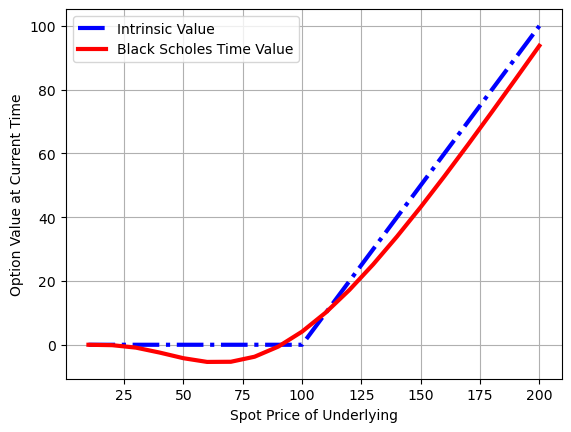

In [11]:
# Generate spot prices 
import matplotlib.pyplot as plt
S = np.linspace(10, 200, 20)
h = np.maximum(S - K, 0) # payoff of the option
C = [bs_call(Szero,K,T,r,sigma) for Szero in S] #BS call option values

plt.figure()
plt.plot(S, h, 'b-.', lw=3, label='Intrinsic Value') 
plt.plot(S, C, 'r', lw=3, label='Black Scholes Time Value') 
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('Spot Price of Underlying')
plt.ylabel('Option Value at Current Time')

#### <span style='color:red'> Plotting Different Vars Effect on Option Value

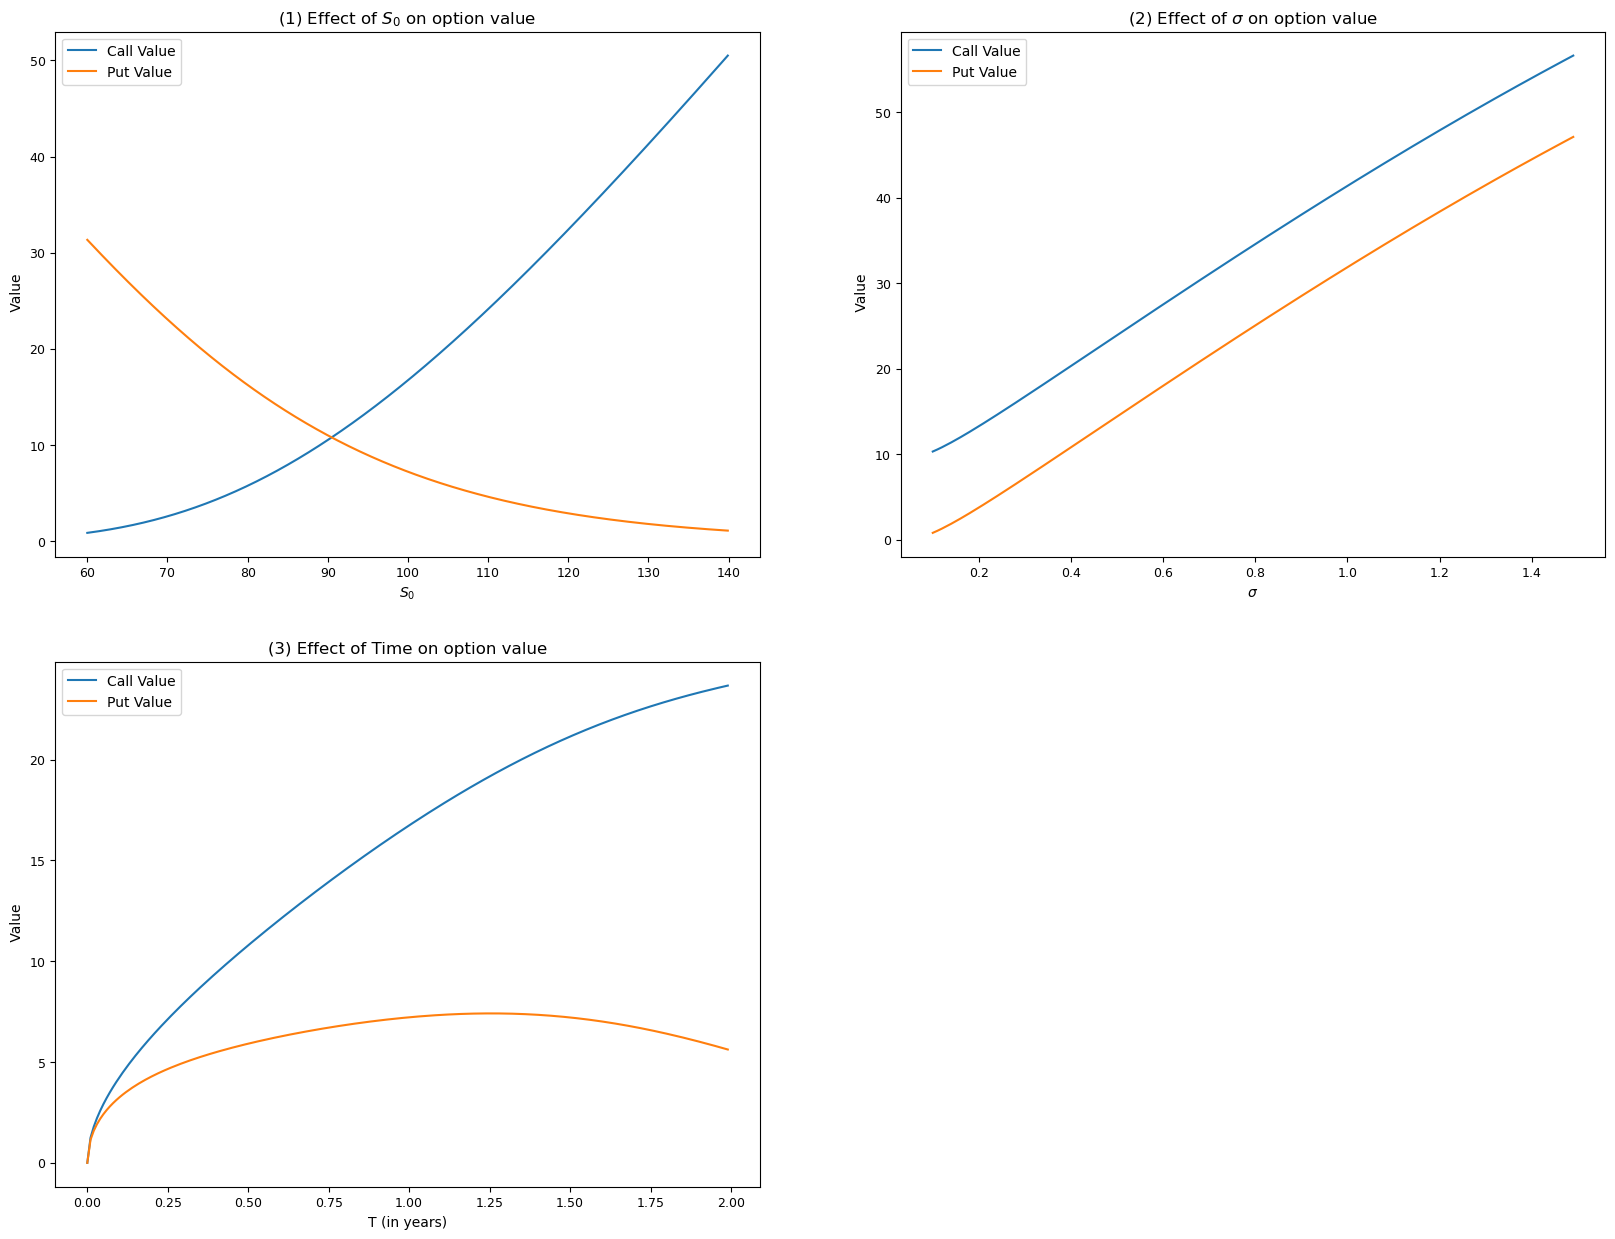

In [73]:
import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True, figsize = (20,15))
K = 100
r = 0.1
T = 1
S = 100
r=0.1
sigma = 0.3

plot1 = plt.subplot2grid((2, 2), (0, 0))
plot2 = plt.subplot2grid((2, 2), (0, 1))
plot3 = plt.subplot2grid((2, 2), (1, 0))


#1) Effect of stock price on option value
S1 = np.arange(60,140,0.1)
calls = [bs_call(s0, K, T, r, sigma) for s0 in S1]
puts = [bs_put(s0, K, T, r, sigma) for s0 in S1]
plot1.plot(S1, calls, label='Call Value')
plot1.plot(S1, puts, label='Put Value')
plot1.set_xlabel('$S_0$')
plot1.set_ylabel(' Value')
plot1.legend()
plot1.set_title('(1) Effect of $S_0$ on option value')

#2) Effect of sigma on option value
Sigmas = np.arange(0.1, 1.5, 0.01)
calls = [bs_call(S, K, T, r, sig) for sig in Sigmas]
puts = [bs_put(S, K, T, r, sig) for sig in Sigmas]
plot2.plot(Sigmas, calls, label='Call Value')
plot2.plot(Sigmas, puts, label='Put Value')
plot2.set_xlabel('$\sigma$')
plot2.set_ylabel(' Value')
plot2.legend()
plot2.set_title('(2) Effect of $\sigma$ on option value')

#3) Effect of time on option value
T = np.arange(0, 2, 0.01)
calls = [bs_call(S, K, t, r, sigma) for t in T]
puts = [bs_put(S, K, t, r, sigma) for t in T]
plot3.plot(T, calls, label='Call Value')
plot3.plot(T, puts, label='Put Value')
plot3.set_xlabel('T (in years)')
plot3.set_ylabel(' Value')
plot3.legend()
plot3.set_title('(3) Effect of Time on option value')


plt.show()

#### <span style='color:red'> Problems with BS Model:
1) Volatility is not constant as assumed by the model
2) The model underestimates the tail density of volatility

Text(0.5, 1.0, '1) AAPL Rolling Volatility')

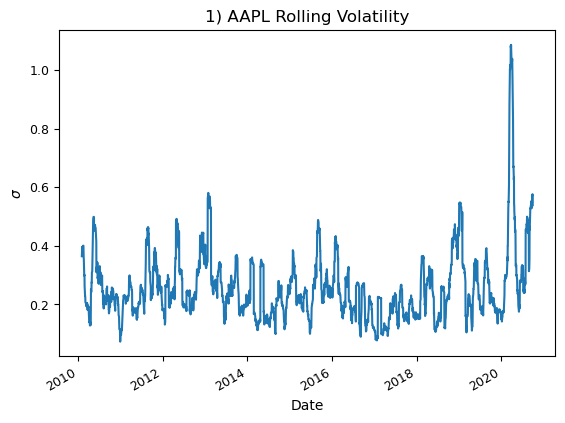

In [130]:
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf
from yahoofinancials import YahooFinancials

aapl_df = yf.download('AAPL', 
                      start='2010-01-01', 
                      end='2020-10-01', 
                      progress=False)

aapl_df['change'] = aapl_df['Adj Close'].pct_change()
aapl_df['rolling_sigma'] = aapl_df['change'].rolling(20).std() * np.sqrt(255)

aapl_df.rolling_sigma.plot()
plt.ylabel('$\sigma$')
plt.title('1) AAPL Rolling Volatility')

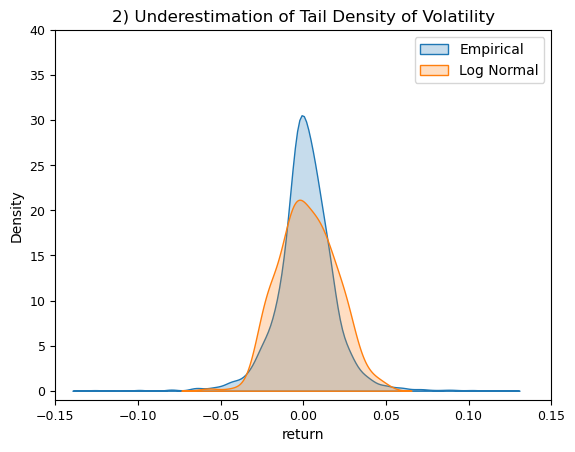

In [143]:
import seaborn as sns

std = aapl_df.change.std()
WT = np.random.normal(aapl_df.change.mean() ,std, size=300)
#plt.hist(np.exp(WT)-1,bins=300,color='red',alpha=0.4);
#plt.hist(aapl_df.change,bins=200,color='black', alpha=0.4);
#plt.xlim([-0.03,0.03])

fig, ax = plt.subplots()
ax = sns.kdeplot(data=aapl_df['change'].dropna(), label='Empirical', ax=ax,shade=True)
ax = sns.kdeplot(data=WT, label='Log Normal', ax=ax,shade=True)
plt.xlim([-0.15,0.15])
plt.ylim([-1,40])
plt.title('2) Underestimation of Tail Density of Volatility')
plt.xlabel('return')
plt.ylabel('Density')
plt.legend()

#### <span style='color:red'> Volatility Smile
    The volatility smile is related to the fact that options at different strikes have different levels of implied volatility.

In [171]:
# dependencies
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
from mpl_toolkits import mplot3d
from datetime import datetime
from itertools import chain
from matplotlib import cm

# choose a ticker and get data via yfinance
sTicker = "AMZN"
stock = yf.Ticker(ticker)
# store maturities
lMaturity = list(stock.options)

# get current date
today = datetime.now().date()
# empty list for days to expiration
lDTE = []
# empty list to store data for calls
lData_calls = []
# loop over maturities
for maturity in lMaturity:
    # maturity date
    maturity_date = datetime.strptime(maturity, '%Y-%m-%d').date()
    # DTE: difference between maturity date and today
    lDTE.append((maturity_date - today).days)
    # store call data
    lData_calls.append(stock.option_chain(maturity).calls)

In [172]:
# create empty lists to contain unlisted data
lStrike = []
lDTE_extended = []
lImpVol = []
for i in range(0,len(lData_calls)):
    # append strikes to list
    lStrike.append(lData_calls[i]["strike"])
    # repeat DTE so the list has same length as the other lists
    lDTE_extended.append(np.repeat(lDTE[i], len(lData_calls[i])))
    # append implied volatilities to list
    lImpVol.append(lData_calls[i]["impliedVolatility"])
    
# unlist list of lists
lStrike = list(chain(*lStrike))
lDTE_extended = list(chain(*lDTE_extended))
lImpVol = list(chain(*lImpVol))

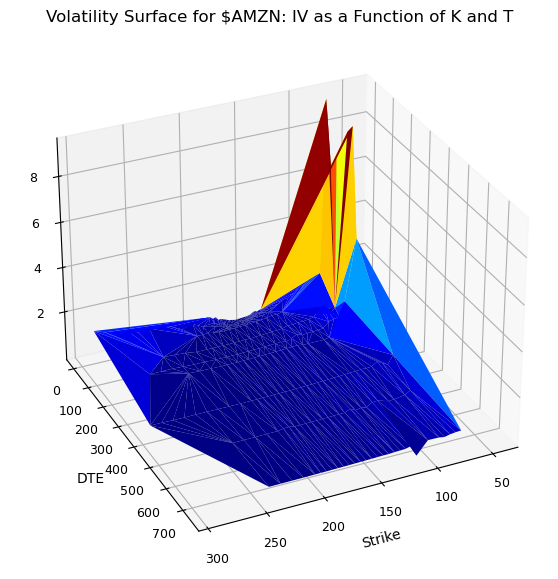

In [173]:
# initiate figure
fig = plt.figure(figsize=(7,7))
# set projection to 3d
axs = plt.axes(projection="3d")
# use plot_trisurf from mplot3d to plot surface and cm for color scheme
axs.plot_trisurf(lStrike, lDTE_extended, lImpVol, cmap=cm.jet)
# change angle
axs.view_init(30, 65)
# add labels
plt.xlabel("Strike")
plt.ylabel("DTE")
plt.title("Volatility Surface for $"+sTicker+": IV as a Function of K and T")
plt.show()

### References:
- https://github.com/yhilpisch/dawp
- http://www.smileofthales.com/options-greeks-python/
- http://www.maths.usyd.edu.au/u/UG/SM/MATH3075/r/Haug_Taleb_2011.pdf
- https://www.cs.princeton.edu/courses/archive/fall09/cos323/papers/black_scholes73.pdf
- https://www.codearmo.com/python-tutorial/options-trading-black-scholes-model
- https://sites.google.com/view/vinegarhill-financelabs/black-scholes-merton?authuser=0
- https://clinthoward.github.io/portfolio/2017/04/16/BlackScholesGreeks/

#### <span style='color:red'> Black Scholes Implementation with Cython

In [1]:
%load_ext cython

In [2]:
%%cython

cdef int a = 0
for i in range(10):
    a += i
print(a)

45


In [5]:
%%cython

import pyximport
pyximport.install()

cdef extern from "math.h" nogil:
    double exp(double)
    double sqrt(double)
    double pow(double, double)
    double log(double)
    double erf(double)

cdef double std_norm_cdf(double x):
    return 0.5*(1+erf(x/sqrt(2.0)))

def black_scholes(double s, double k, double t, double v,
                 double rf, double div, double cp):
    """Price an option using the Black-Scholes model.
    
    s : initial stock price
    k : strike price
    t : expiration time
    v : volatility
    rf : risk-free rate
    div : dividend
    cp : +1/-1 for call/put
    """
    cdef double d1, d2, optprice
    d1 = (log(s/k)+(rf-div+0.5*pow(v,2))*t)/(v*sqrt(t))
    d2 = d1 - v*sqrt(t)
    optprice = cp*s*exp(-div*t)*std_norm_cdf(cp*d1) - \
        cp*k*exp(-rf*t)*std_norm_cdf(cp*d2)
    return optprice

In [6]:
black_scholes(100.0, 100.0, 1.0, 0.3, 0.03, 0.0, -1)

10.327861752731728

### References:
- https://github.com/ellisonbg